**In this notebook, we integrate the open chromatin regions (peaks from ATAC-seq) with the DEGs from RNA-seq.**

**Filtering is applied to the ATAC peak data so only peaks in exon and promoter region are considered**

In [1]:
import pandas as pd
import numpy as np

from venn import venn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
RNA_DEG_7_75 = pd.read_excel(
    '../../RNA-seq/E7.75_FLAG-Lhx1_RNA_seq_gene_list.xlsx',
    sheet_name='List A protein-coding only')
RNA_DEG_7_75_up = RNA_DEG_7_75[RNA_DEG_7_75['C3_dox'] > 0]
RNA_DEG_7_75_down = RNA_DEG_7_75[RNA_DEG_7_75['C3_dox'] < 0]

In [3]:
RNA_DEG_9_5 = pd.read_excel(
    '../../RNA-seq/E9.5_FLAG-Lhx1_RNA-seq_gene_list.xlsx',
    sheet_name='List A')
RNA_DEG_9_5_up = RNA_DEG_9_5[RNA_DEG_9_5['WT_c3_Dox'] > 0]
RNA_DEG_9_5_down = RNA_DEG_9_5[RNA_DEG_9_5['WT_c3_Dox'] < 0]

# ATAC E7.75 vs RNA E7.75

## WT_HOM vs RNA

In [21]:
ATAC_DEP_7_75_WT = pd.read_csv(
    '../../DEP_E.7.75/diff_CTRL_E7.75_vs_MUT_E7.75_c3.0_cond1_annotated.txt',
    sep='\t')
ATAC_DEP_7_75_HOM = pd.read_csv(
    '../../DEP_E.7.75/diff_CTRL_E7.75_vs_MUT_E7.75_c3.0_cond2_annotated.txt',
    sep='\t')

In [22]:
ATAC_DEP_7_75_WT = ATAC_DEP_7_75_WT[ATAC_DEP_7_75_WT['Annotation'].str.contains('exon|promoter', regex=True)]
ATAC_DEP_7_75_HOM = ATAC_DEP_7_75_HOM[ATAC_DEP_7_75_HOM['Annotation'].str.contains('exon|promoter', regex=True)]

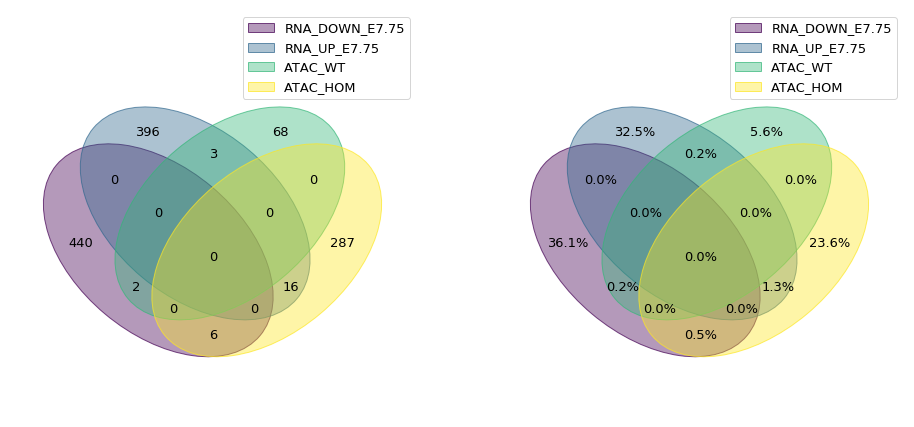

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 16))
data_venn = {
    'RNA_DOWN_E7.75': set(RNA_DEG_7_75_down['Gene name']),
    'RNA_UP_E7.75': set(RNA_DEG_7_75_up['Gene name']),
    'ATAC_WT': set(ATAC_DEP_7_75_WT['Gene Name']),
    'ATAC_HOM': set(ATAC_DEP_7_75_HOM['Gene Name'])
}
venn(data_venn, ax = ax1)
venn(data_venn, fmt="{percentage:.1f}%", ax = ax2)

## WT_HET vs RNA

In [18]:
ATAC_DEP_7_75_WT = pd.read_csv(
    '../../DEP_E.7.75/diff_CTRL_E7.75_vs_HET_E7.75_c3.0_cond1_annotated.txt',
    sep='\t')
ATAC_DEP_7_75_HET = pd.read_csv(
    '../../DEP_E.7.75/diff_CTRL_E7.75_vs_HET_E7.75_c3.0_cond2_annotated.txt',
    sep='\t')

In [19]:
ATAC_DEP_7_75_WT = ATAC_DEP_7_75_WT[ATAC_DEP_7_75_WT['Annotation'].str.contains('exon|promoter', regex=True)]
ATAC_DEP_7_75_HET = ATAC_DEP_7_75_HET[ATAC_DEP_7_75_HET['Annotation'].str.contains('exon|promoter', regex=True)]

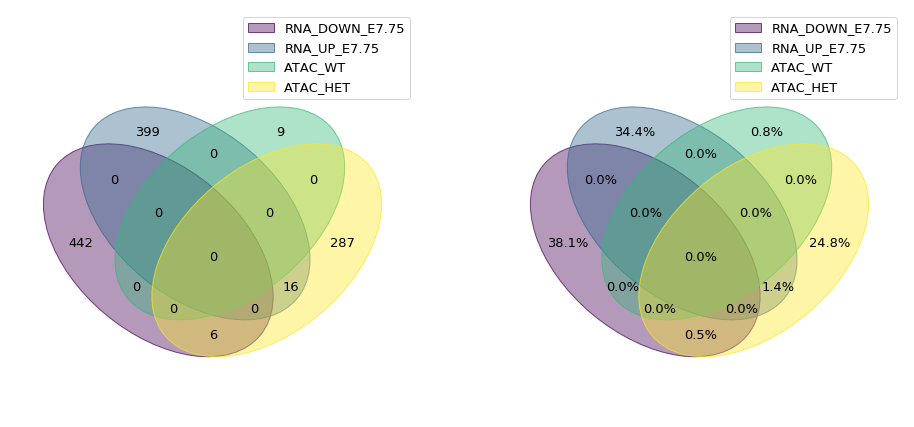

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 16))
data_venn = {
    'RNA_DOWN_E7.75': set(RNA_DEG_7_75_down['Gene name']),
    'RNA_UP_E7.75': set(RNA_DEG_7_75_up['Gene name']),
    'ATAC_WT': set(ATAC_DEP_7_75_WT['Gene Name']),
    'ATAC_HET': set(ATAC_DEP_7_75_HOM['Gene Name'])
}
venn(data_venn, ax = ax1)
venn(data_venn, fmt="{percentage:.1f}%", ax = ax2)

## HET_MUT vs RNA

In [15]:
ATAC_DEP_7_75_HET = pd.read_csv(
    '../../DEP_E.7.75/diff_HET_E7.75_vs_MUT_E7.75_c3.0_cond1_annotated.txt',
    sep='\t')
ATAC_DEP_7_75_MUT = pd.read_csv(
    '../../DEP_E.7.75/diff_HET_E7.75_vs_MUT_E7.75_c3.0_cond2_annotated.txt',
    sep='\t')

In [16]:
ATAC_DEP_7_75_HET = ATAC_DEP_7_75_HET[ATAC_DEP_7_75_HET['Annotation'].str.contains('exon|promoter', regex=True)]
ATAC_DEP_7_75_MUT = ATAC_DEP_7_75_MUT[ATAC_DEP_7_75_MUT['Annotation'].str.contains('exon|promoter', regex=True)]

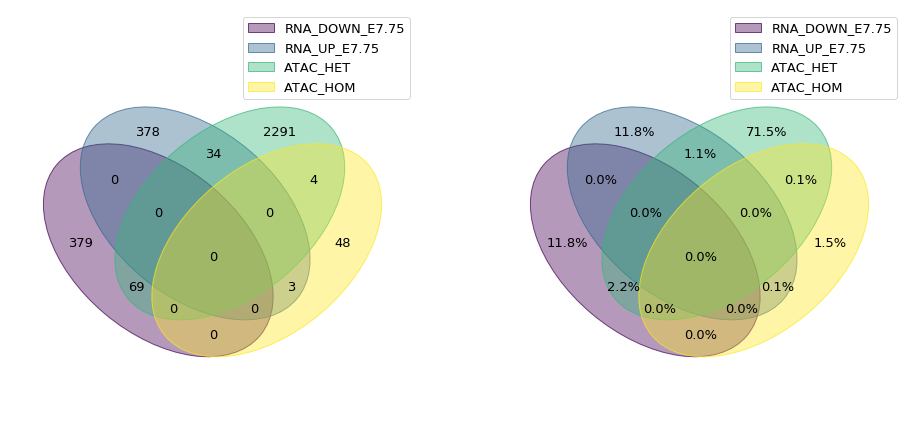

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 16))
data_venn = {
    'RNA_DOWN_E7.75': set(RNA_DEG_7_75_down['Gene name']),
    'RNA_UP_E7.75': set(RNA_DEG_7_75_up['Gene name']),
    'ATAC_HET': set(ATAC_DEP_7_75_HET['Gene Name']),
    'ATAC_HOM': set(ATAC_DEP_7_75_MUT['Gene Name'])
}
venn(data_venn, ax = ax1)
venn(data_venn, fmt="{percentage:.1f}%", ax = ax2)